In [4]:
import pandas as pd
import numpy as np  #linear algebra
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df = df.iloc[:, 2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [8]:
df.shape

(400, 3)


# **Train Test Split**

In [9]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x, y

(     Age  EstimatedSalary
 0     19            19000
 1     35            20000
 2     26            43000
 3     27            57000
 4     19            76000
 ..   ...              ...
 395   46            41000
 396   51            23000
 397   50            20000
 398   36            33000
 399   49            36000
 
 [400 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=43, stratify=y)

In [11]:
x_train, x_test, y_train, y_test


(     Age  EstimatedSalary
 217   40            78000
 221   35            91000
 57    28            79000
 56    23            48000
 254   50            44000
 ..   ...              ...
 356   54            70000
 44    28            84000
 328   36           118000
 291   49            89000
 150   26            15000
 
 [300 rows x 2 columns],
      Age  EstimatedSalary
 388   47            34000
 219   59           143000
 157   29            75000
 201   49            74000
 334   57            60000
 ..   ...              ...
 304   40            60000
 132   30            87000
 154   40            47000
 144   34            25000
 35    35            27000
 
 [100 rows x 2 columns],
 217    0
 221    1
 57     0
 56     0
 254    0
       ..
 356    1
 44     0
 328    1
 291    1
 150    0
 Name: Purchased, Length: 300, dtype: int64,
 388    1
 219    1
 157    0
 201    0
 334    1
       ..
 304    0
 132    0
 154    0
 144    0
 35     0
 Name: Purchased, Length: 100, dt

#**Standard Scaler**

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled  = sc.transform(x_test)

In [13]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled  = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [14]:
np.round(x_train_scaled.describe())

,Age,EstimatedSalary
count,300.0,300.0
mean,0.0,-0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,-0.0
75%,1.0,1.0
max,2.0,2.0


# **Effect of scaling**

Text(0, 0.5, 'Estimated Salary')

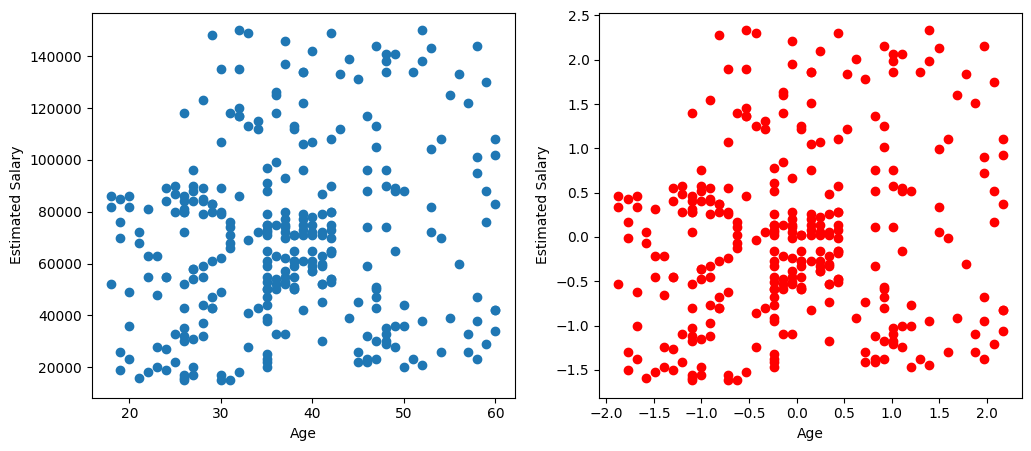

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')

ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'], color = 'red')
ax2.set_xlabel('Age')
ax2.set_ylabel('Estimated Salary')

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

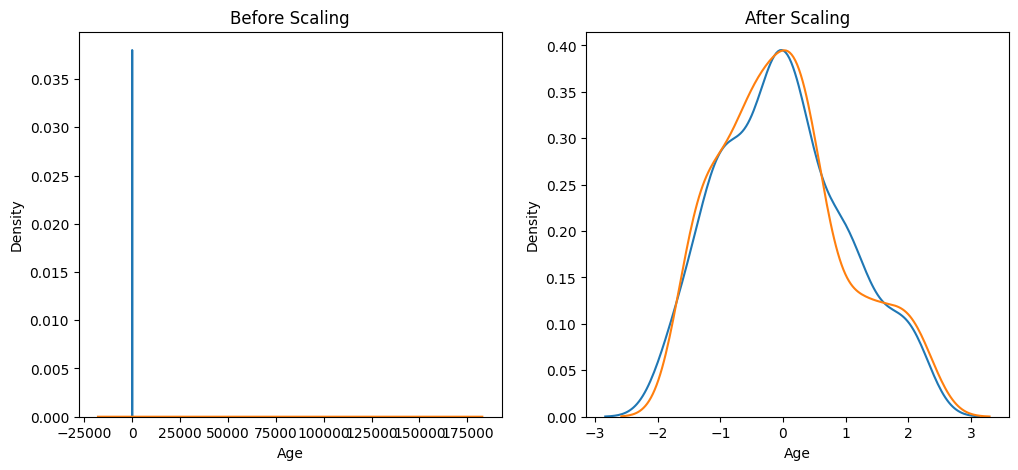

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

#after scaling
ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)



# **why scaling is important**

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [18]:
lr_scaled = LogisticRegression()
lr_scaled.fit(x_train_scaled, y_train)

LogisticRegression()

In [19]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [20]:
from sklearn.metrics import accuracy_score

print('Before Scaling:', accuracy_score(y_test, y_pred))
print('After Scaling:', accuracy_score(y_test, y_pred_scaled))

Before Scaling: 0.79
After Scaling: 0.79
